In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Conv2DTranspose

In [25]:
# load mnist data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = np.expand_dims(x_train, axis=3).astype(np.float32) / 255.
x_test = np.expand_dims(x_test, axis=3).astype(np.float32) / 255.
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [26]:
# build simple DNN autoencoder
def get_dnn_autoencoder_model(latent_dim=128):
    # encoding: (28, 28, 1) -> (784, )
    x = x_input = Input(shape=(28, 28, 1))
    x = Flatten()(x)
    encoded = Dense(latent_dim, activation='relu')(x)
    # decoding: (784, ) -> (28, 28 1)
    x = Dense(784, activation='sigmoid')(encoded)
    decoded = tf.reshape(x, (-1, 28, 28, 1))
    autoencoder = Model(x_input, decoded)
    return autoencoder

autoencoder_dnn = get_dnn_autoencoder_model()
autoencoder_dnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())
autoencoder_dnn.fit(x_train, x_train, epochs=10, validation_data=(x_test, x_test), verbose=0)

In [27]:
# build stacked Convolutional autoencoder
def get_cnn_autoencoder_model():
    # encoding: (28, 28, 1) -> (7, 7, 8)
    x = x_input = Input(shape=(28, 28, 1))
    x = Conv2D(32, 3, activation='relu', padding='same', strides=2)(x)
    x = Conv2D(8, 3, activation='relu', padding='same', strides=2)(x)
    # decoding: (7, 7, 8) -> (28, 28, 1)
    x = Conv2DTranspose(8, 3, activation='relu', padding='same', strides=2)(x)
    x = Conv2DTranspose(32, 3, activation='relu', padding='same', strides=2)(x)
    x = Conv2D(1, 3, activation='sigmoid', padding='same')(x)
    autoencoder = Model(x_input, x)
    return autoencoder

autoencoder_cnn = get_dnn_autoencoder_model()
autoencoder_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())
autoencoder_cnn.fit(x_train, x_train, epochs=10, validation_data=(x_test, x_test), verbose=0)

Text(0.5, 0.98, 'CNN autoencer decoded images')

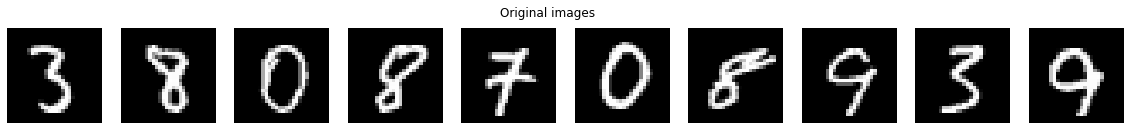

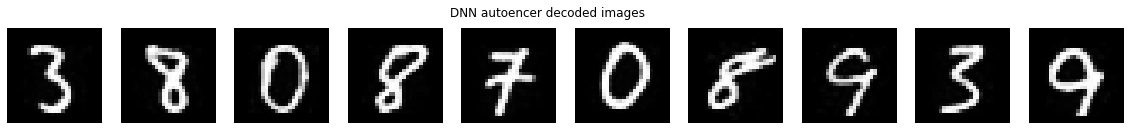

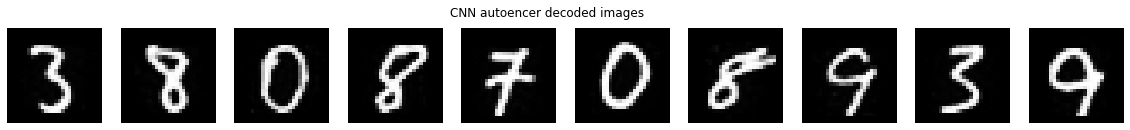

In [28]:
permutation = np.random.randint(0, 9999, 10)
test_input = x_test[permutation]

output_dnn = autoencoder_dnn.predict(test_input)
output_cnn = autoencoder_cnn.predict(test_input)

fig_orig, ax_orig = plt.subplots(1, 10, figsize=(20, 2))
fig_dnn, ax_dnn = plt.subplots(1, 10, figsize=(20, 2))
fig_cnn, ax_cnn = plt.subplots(1, 10, figsize=(20, 2))

for ax, img in zip((ax_orig, ax_dnn, ax_cnn), (test_input, output_dnn, output_cnn)):
    for i in range(10):
        ax[i].imshow(img[i].reshape(28, 28), cmap='gray')
        ax[i].set_axis_off()

fig_orig.suptitle("Original images")
fig_dnn.suptitle("DNN autoencer decoded images")
fig_cnn.suptitle("CNN autoencer decoded images")